**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing data from csv and getting info about data**

In [ ]:
data = pd.read_csv('/content/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.shape

(8790, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


**Data Cleaning**

Checking for missing values

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


Drop Duplicates

In [ ]:
data.drop_duplicates(inplace=True)

**Content Distribution on Netfilx**

In [ ]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


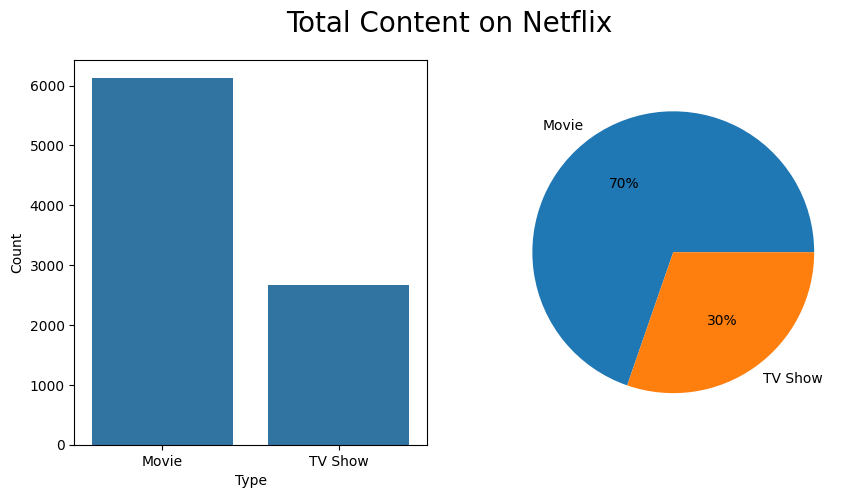

In [ ]:
count = data['type'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=data['type'])
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(count, labels=count.index, autopct='%1.f%%')

plt.suptitle('Total Content on Netflix', fontsize=20)

plt.show()

**Rating frequency of movies and TV Shows on Netflix**

In [ ]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


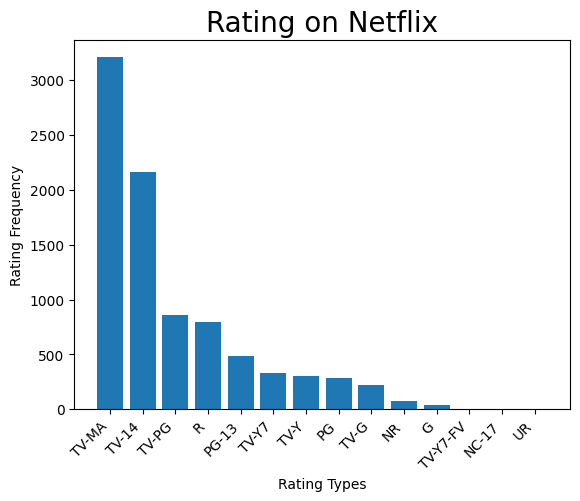

In [ ]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title('Rating on Netflix', fontsize=20)
plt.show()

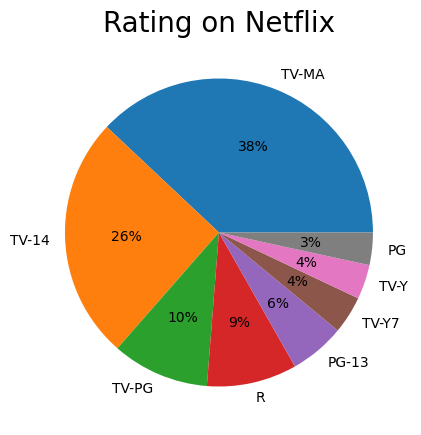

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(data['rating'].value_counts()[:8], labels=data['rating'].value_counts().index[:8], autopct='%1.f%%')
plt.title('Rating on Netflix',fontsize=20)
plt.show()

**Converting date_added column to datetime**

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


**Top 10 countries with most content on Netflix**

In [ ]:
data['country'].value_counts()

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Iran,1
West Germany,1
Greece,1


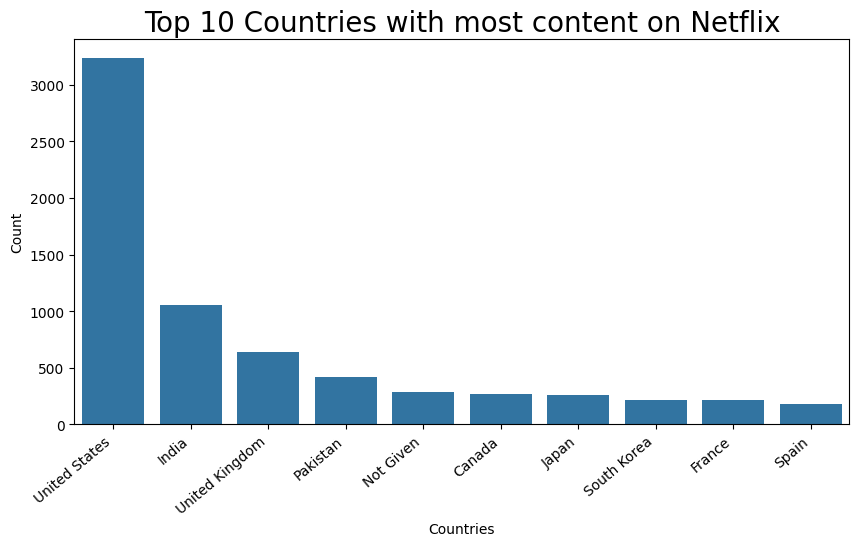

In [ ]:
countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=countries['country'][:10], y=countries['count'][:10])
plt.xticks(rotation=40, ha='right')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries with most content on Netflix', fontsize=20)
plt.show()

Extract Year, Month & Day from date added column

In [ ]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24


**Monthly releases of Movies and TV shows on Netflix**

In [ ]:
monthly_movies_release = data[data['type'] == 'Movie'].value_counts('month').sort_index()
monthly_tvshows_release = data[data['type'] == 'TV Show'].value_counts('month').sort_index()

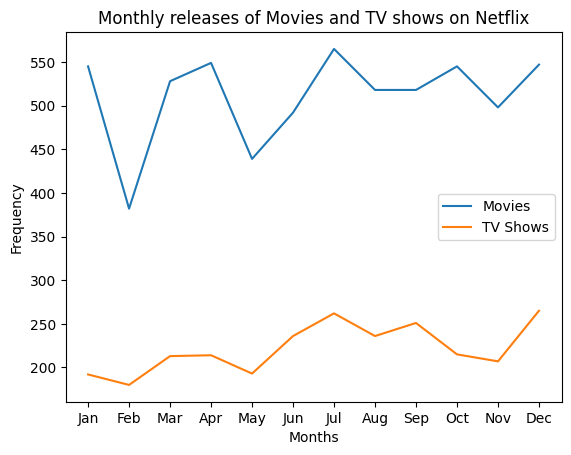

In [ ]:
plt.plot(monthly_movies_release, label='Movies')
plt.plot(monthly_tvshows_release, label='TV Shows')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Monthly releases of Movies and TV shows on Netflix')
plt.legend()
plt.show()

**Yearly releases of Movies and TV shows on Netflix**

In [ ]:
yearly_movies_release = data[data['type'] == 'Movie'].value_counts('year').sort_index()
yearly_tvshows_release = data[data['type'] == 'TV Show'].value_counts('year').sort_index()

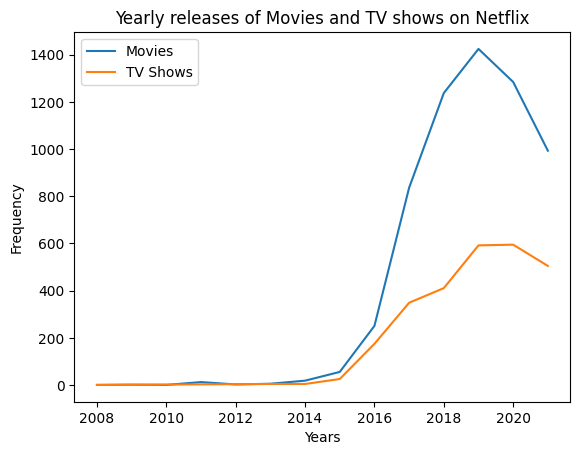

In [ ]:
plt.plot(yearly_movies_release, label='Movies')
plt.plot(yearly_tvshows_release, label='TV Shows')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Yearly releases of Movies and TV shows on Netflix')
plt.legend()
plt.show()

**Top 10 Genres on Netflix**

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

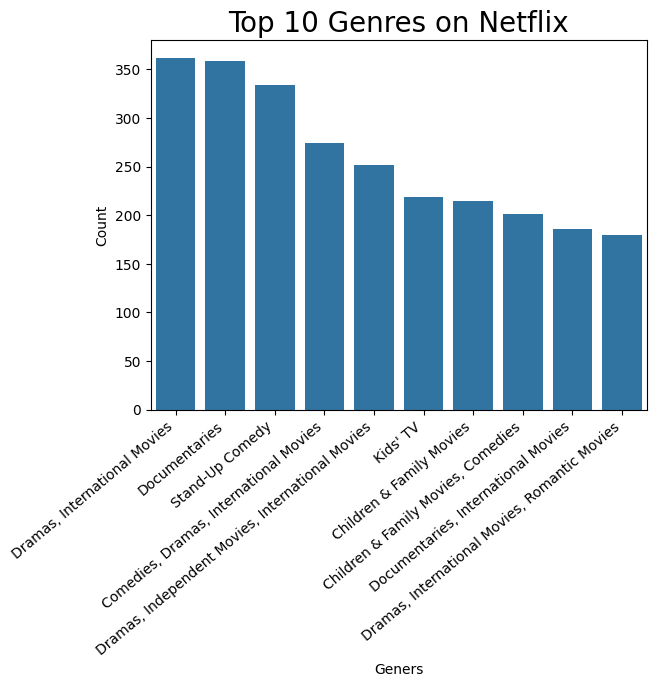

In [ ]:
geners = data['listed_in'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=geners.index, y=geners.values)
plt.xticks(rotation=40, ha='right')
plt.xlabel('Geners')
plt.ylabel('Count')
plt.title('Top 10 Genres on Netflix', fontsize=20)

**Top 10 Directors on Netflix**

Text(0.5, 1.0, 'Top 10 Directors on Netflix')

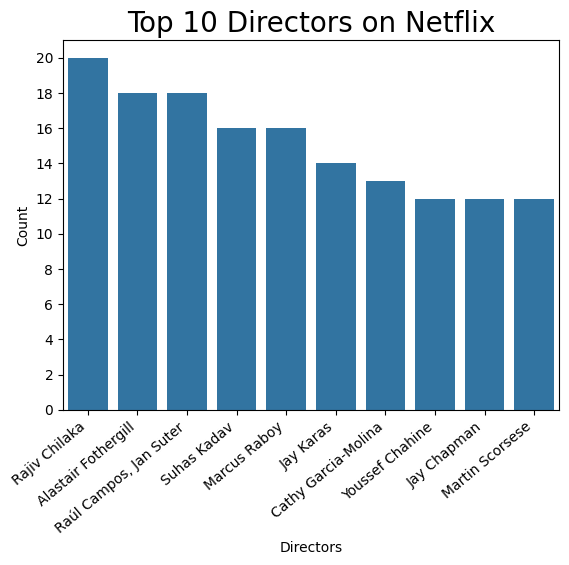

In [ ]:
director = data['director'].value_counts().sort_values(ascending=False)[1:11]
sns.barplot(x=director.index, y=director.values)
plt.xticks(rotation=40, ha='right')
plt.yticks(range(0,22,2))
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 10 Directors on Netflix', fontsize=20)
